In [151]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations

## Notebook to figure out attractor "fake star" boost formula

In [ ]:
# attractor?: 1.8855620043112253e-07
# attractor?: 0.9772063185686546
# attractor?: 0.11183916337031041
# attractor?: 0.4023997194755462
# attractor?: 0.7475658379309105
# attractor?: 0.6436092241786782

In [19]:
# batting: 0.6093857658130397 -> 1.3739899702965452 (added: 0.76460420448)
# pitching: 0.7130959835516578 -> 1.5453320789990581 (added: 0.83223609544)
# baserunning: 0.16649469485574486 -> 0.7480266318734069 (added: 0.58153193701)
# defense: 0.5340988884709847 -> 1.4861416521770414 (added: 0.9520427637)

In [142]:
rolls = np.array([0.9772063185686546, 0.11183916337031041, 0.4023997194755462, 0.7475658379309105, 0.6436092241786782,
                 0.006302368941637715, 0.21894378835437567, 0.11504878331187385, 0.7203934924123341, 0.607673674139176,
                 0.3025532283627701, 0.9200712728434277, 0.44779954309209047, 0.4706988191843251, 0.7773508792110455,
                 0.7604876150450022, 0.980699180916847, 0.9688300796068063, 0.6958450903925995, 0.47097756839867855,
                 0.7120524034734126, 0.027945612557191746, 0.648635159892009])
boosts = np.array([0.76460420448, 0.83223609544, 0.58153193701, 0.9520427637])
len(rolls)

23

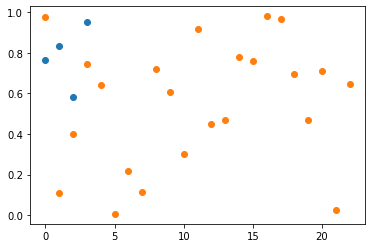

In [58]:
plt.plot(boosts, 'o')
plt.plot(rolls, 'o')


In [127]:
p1, sse, __, __, __ = np.polyfit(rolls[11:15], boosts, 1, cov=False, full=True)

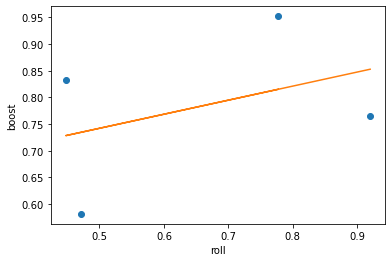

In [129]:
plt.plot(rolls[11:15], boosts, 'o')
plt.plot(rolls[11:15], p1[1] + p1[0]*rolls[11:15])
plt.xlabel('roll')
plt.ylabel('boost')
plt.savefig('attractor.png', facecolor='white')

In [184]:
pbest = np.array([0, 0])
ssebest = np.array([np.inf])
nbest = 0
perms = set(permutations(np.array([0, 1, 2, 3])))
permbest = perm[0]

for n in np.arange(len(rolls) - 3):
    for perm in perms:
        p, sse, __, __, __ = np.polyfit(rolls[n:n+4], boosts[np.array(perm)], 1, cov=False, full=True)
        if sse < ssebest:
            ssebest = sse
            pbest = p
            nbest = n
            permbest = perm
print(nbest, pbest, ssebest, permbest)
print('rolls:\t\t', rolls[nbest:nbest+4])
print('boosts:\t\t', boosts[np.array(permbest)])
print('0.4 + 0.6*rolls:', 0.4 + 0.6*rolls[nbest:nbest+4])

8 [0.6 0.4] [1.02367719e-23] (1, 0, 2, 3)
rolls:		 [0.72039349 0.60767367 0.30255323 0.92007127]
boosts:		 [0.8322361  0.7646042  0.58153194 0.95204276]
0.4 + 0.6*rolls: [0.8322361  0.7646042  0.58153194 0.95204276]


In [182]:
rolls

array([0.97720632, 0.11183916, 0.40239972, 0.74756584, 0.64360922,
       0.00630237, 0.21894379, 0.11504878, 0.72039349, 0.60767367,
       0.30255323, 0.92007127, 0.44779954, 0.47069882, 0.77735088,
       0.76048762, 0.98069918, 0.96883008, 0.69584509, 0.47097757,
       0.7120524 , 0.02794561, 0.64863516])

In [ ]:
# batting: 0.6093857658130397 -> 1.3739899702965452 (added: 0.76460420448)
# pitching: 0.7130959835516578 -> 1.5453320789990581 (added: 0.83223609544)
# baserunning: 0.16649469485574486 -> 0.7480266318734069 (added: 0.58153193701)
# defense: 0.5340988884709847 -> 1.4861416521770414 (added: 0.9520427637)